# FEM Viscoelastic Material Definitions
The viscoelastic digital phantoms have been generated using a shear relaxation defined as:

$$G(t) = G_\infty + (G_0 - G\infty)e^{-\beta t}$$.

This formation is equivalent to a standard linear VE material, where $G_\infty$ represents a spring ($\mu_1$) that is in parallel with a series combination of another spring of stiffness $\mu_2$ = $(G_0 - G_\infty)$ and a dashpot with viscosity $\eta = \frac{G_0 - G_\infty}{\beta}$.

The three viscoelastic materials we simulated were:
1. $G_0$ = 10.0 kPa, $G_\infty$ = 2.0 kPa, $\beta$ = 6666.7 s$^{-1}$
2. $G_0$ = 15.0 kPa, $G_\infty$ = 4.0 kPa, $\beta$ = 5500.0 s$^{-1}$
3. $G_0$ = 20.0 kPa, $G_\infty$ = 4.0 kPa, $\beta$ = 4000.0 s$^{-1}$

# Deriving Shear Wave Phase Velocity
$$\mu(\omega) = \frac{\mu_1 \mu_2 + i \omega \eta (\mu_1 + \mu_2)}{\mu_2 + i \omega \eta} = {\mu'}(\omega) + i {\mu''}e(\omega)$$

$$c(\omega) = \sqrt{\frac{1}{\rho}\frac{2({\mu'}^2+{\mu''}^2)}{{\mu'}+\sqrt{{\mu'}^2+{\mu''}^2}}}$$

# VE Digital Phantom Phase Velocity
The following phase velocity plots are associated with the three different VE materials that were simulated.

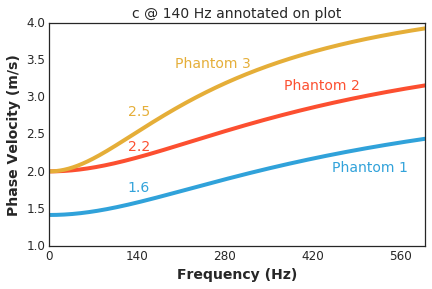

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['figure.titlesize'] = 18

import c_ve_3param

f = range(0, 600)
ve_params = [(10e3, 2e3, 6666.7, 'Phantom 1'), (15e3, 4e3, 5500, 'Phantom 2'), (20e3, 4e3, 4000, 'Phantom 3')] # G0, Ginf, beta
label_positions = [(450, 2.0, 'Phantom 1'), (375,3.1, 'Phantom 2'), (200, 3.4, 'Phantom 3')]
c140_yoffset = [0.15, 0.1, 0.225]
for n, ve in enumerate(ve_params):
    c = c_ve_3param.calc(f, ve[0], ve[1], ve[2])
    h = plt.plot(f, c, label=ve[3])
    plt.xticks(range(0, 600, 140), range(0, 600, 140))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Phase Velocity (m/s)')
    plt.title('c @ 140 Hz annotated on plot')
    c140 = c_ve_3param.calc(140, ve[0], ve[1], ve[2])
    plt.annotate("%.1f" % c140, xy=(140, c140), xycoords='data', xytext=(125, c140+c140_yoffset[n]), textcoords='data', color=h[0].get_color())
    plt.text(label_positions[n][0], label_positions[n][1], label_positions[n][2], color=h[0].get_color())